In [6]:
import scipy.io as sio 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

channel = 40
experiment_path = r"C:\Users\ingri\OneDrive\Documentos\IMIM\RJH006 - Copia\RJH006_subj_obj_1\RJH006_eze_miniscr1\all_combined"
data_path = rf"{experiment_path}\times_NSX{channel}.mat"
times_mat = sio.loadmat(data_path)

display(times_mat.keys())

start_subj_obj = 175.35 # seconds

cluster_class = times_mat['cluster_class'] 

#print(cluster_class)
df_clusters = pd.DataFrame(cluster_class, columns=['class', 'spike_time'])

print(df_clusters.head(10))


dict_keys(['__header__', '__version__', '__globals__', 'par', 'spikes', 'inspk', 'Temp', 'forced', 'gui_status', 'cluster_class', 'ipermut'])

   class   spike_time
0    1.0   128.266667
1    1.0   483.100000
2    1.0   509.233333
3    1.0   543.300000
4    1.0   794.766667
5    1.0   812.166667
6    1.0   909.200000
7    1.0  1079.133333
8    1.0  1100.766667
9    1.0  1139.533333


In [3]:
channels = list(range(33, 49))
experiment_path = r"C:\Users\ingri\OneDrive\Documentos\IMIM\RJH006 - Copia\RJH006_subj_obj_1\RJH006_eze_miniscr1\all_combined"
df_clusters_all = pd.DataFrame()

for ch in channels: 
    data_path = rf"{experiment_path}\times_NSX{ch}.mat"
    times_mat = sio.loadmat(data_path)
    cluster_class = times_mat['cluster_class']
    df_clusters = pd.DataFrame(cluster_class, columns=['class', 'spike_time'])
    df_clusters['channel'] = ch 
    print(f"Channel {ch} - Number of spikes: {len(df_clusters)}")
    df_clusters_all = pd.concat([df_clusters_all, df_clusters], ignore_index=True)

print(df_clusters_all.head(1445))
df_clusters_all.to_csv(r"C:\Users\ingri\Documents\IMIM\experiments\RJH006_subj_obj\spike_times_all_channels.csv", index=False)

Channel 33 - Number of spikes: 1658
Channel 34 - Number of spikes: 23544
Channel 35 - Number of spikes: 838
Channel 36 - Number of spikes: 1572
Channel 37 - Number of spikes: 1363
Channel 38 - Number of spikes: 7048
Channel 39 - Number of spikes: 1183
Channel 40 - Number of spikes: 13457
Channel 41 - Number of spikes: 884
Channel 42 - Number of spikes: 859
Channel 43 - Number of spikes: 740
Channel 44 - Number of spikes: 12790
Channel 45 - Number of spikes: 464
Channel 46 - Number of spikes: 12173
Channel 47 - Number of spikes: 13640
Channel 48 - Number of spikes: 368
      class    spike_time  channel
0       1.0  5.093000e+02       33
1       1.0  6.894000e+02       33
2       1.0  8.896333e+02       33
3       1.0  1.329800e+03       33
4       1.0  2.130333e+03       33
...     ...           ...      ...
1440    1.0  1.022931e+06       33
1441    1.0  1.023151e+06       33
1442    1.0  1.023171e+06       33
1443    1.0  1.024151e+06       33
1444    1.0  1.024831e+06       33

[144

In [4]:
#Importing transcription with names and timestamps 
transcription_path = r"C:\Users\ingri\Documents\IMIM\experiments\RJH006_subj_obj\RJH006_subj_obj_names_timestamps_CLASSIFIED_CSV.csv"
df_names = pd.read_csv(transcription_path) 

df_names.head(10)

,chinese_name,english_name,start_time,end_time,chinese_sentence,english_sentence,sentence_start,sentence_end,speaker_id,type_sentence,class_word
0,朱茵,Zhu Yin,6.30,6.66,朱茵、焦恩俊、周星驰、金映娟、张怡宁、七十。,"Zhu Yin, Jiao Enjun, Stephen Chow, Jin Yingjua...",6.30,19.60,0,list_names,none
1,焦恩俊,Jiao Enjun,8.16,8.76,朱茵、焦恩俊、周星驰、金映娟、张怡宁、七十。,"Zhu Yin, Jiao Enjun, Stephen Chow, Jin Yingjua...",6.30,19.60,0,list_names,none
2,周星驰,Stephen Chow,10.86,11.72,朱茵、焦恩俊、周星驰、金映娟、张怡宁、七十。,"Zhu Yin, Jiao Enjun, Stephen Chow, Jin Yingjua...",6.30,19.60,0,list_names,none
3,金映娟,Jin Yingjuan,13.44,14.10,朱茵、焦恩俊、周星驰、金映娟、张怡宁、七十。,"Zhu Yin, Jiao Enjun, Stephen Chow, Jin Yingjua...",6.30,19.60,0,list_names,none
4,张怡宁,Zhang Yining,15.96,16.70,朱茵、焦恩俊、周星驰、金映娟、张怡宁、七十。,"Zhu Yin, Jiao Enjun, Stephen Chow, Jin Yingjua...",6.30,19.60,0,list_names,none
5,朱茵,Zhu Yin,24.04,24.64,啊，六七六四六三，朱茵、焦恩俊、金映娟、周星驰、张怡宁。,"Ah, six seven six four six three, Zhu Yin, Jia...",19.72,30.26,1,list_names,none
6,焦恩俊,Jiao Enjun,25.10,25.74,啊，六七六四六三，朱茵、焦恩俊、金映娟、周星驰、张怡宁。,"Ah, six seven six four six three, Zhu Yin, Jia...",19.72,30.26,1,list_names,none
7,周星驰,Stephen Chow,27.30,27.96,啊，六七六四六三，朱茵、焦恩俊、金映娟、周星驰、张怡宁。,"Ah, six seven six four six three, Zhu Yin, Jia...",19.72,30.26,1,list_names,none
8,金映娟,Jin Yingjuan,26.40,27.10,啊，六七六四六三，朱茵、焦恩俊、金映娟、周星驰、张怡宁。,"Ah, six seven six four six three, Zhu Yin, Jia...",19.72,30.26,1,list_names,none
9,张怡宁,Zhang Yining,28.14,28.66,啊，六七六四六三，朱茵、焦恩俊、金映娟、周星驰、张怡宁。,"Ah, six seven six four six three, Zhu Yin, Jia...",19.72,30.26,1,list_names,none


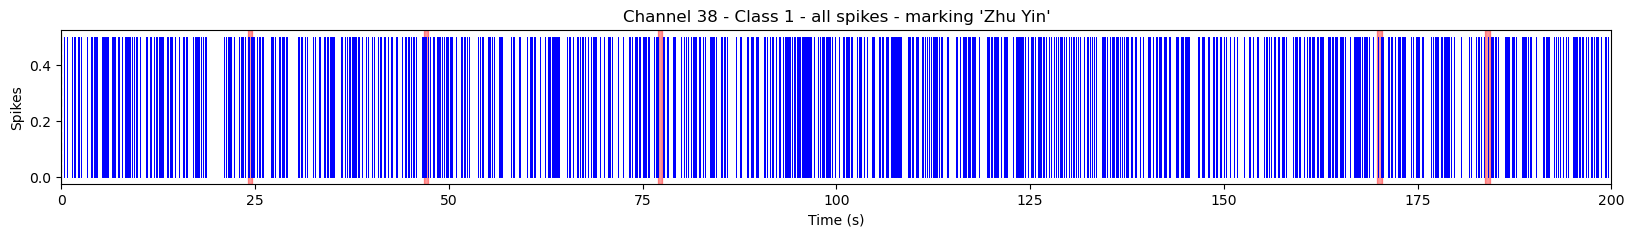

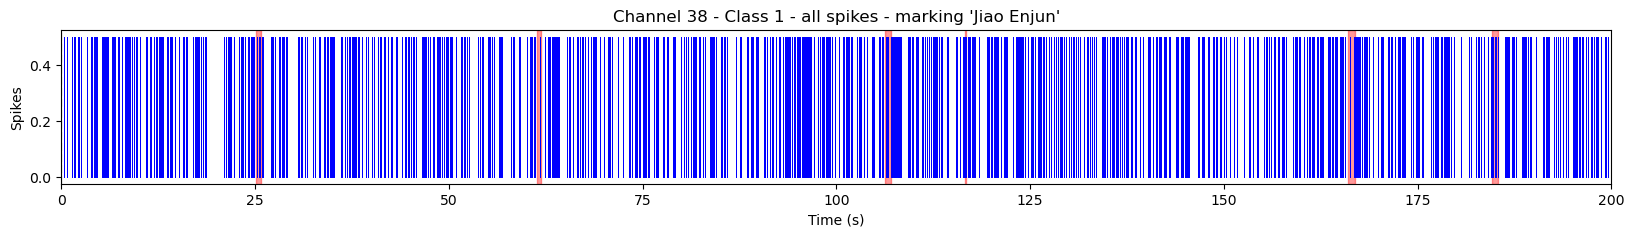

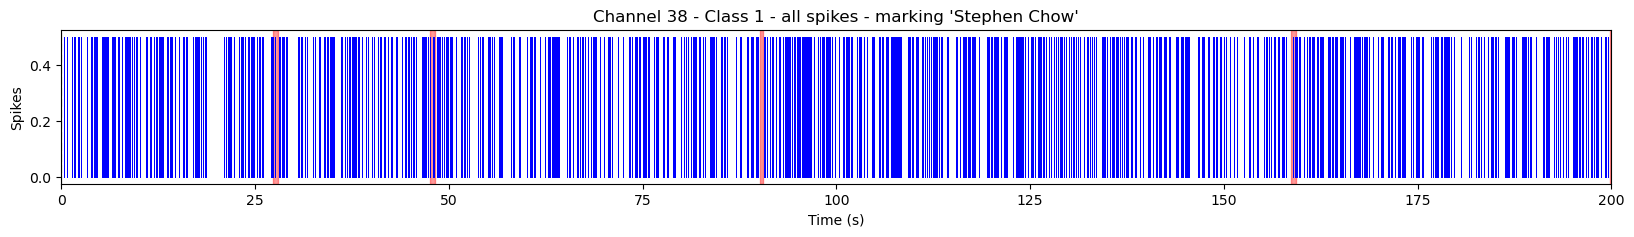

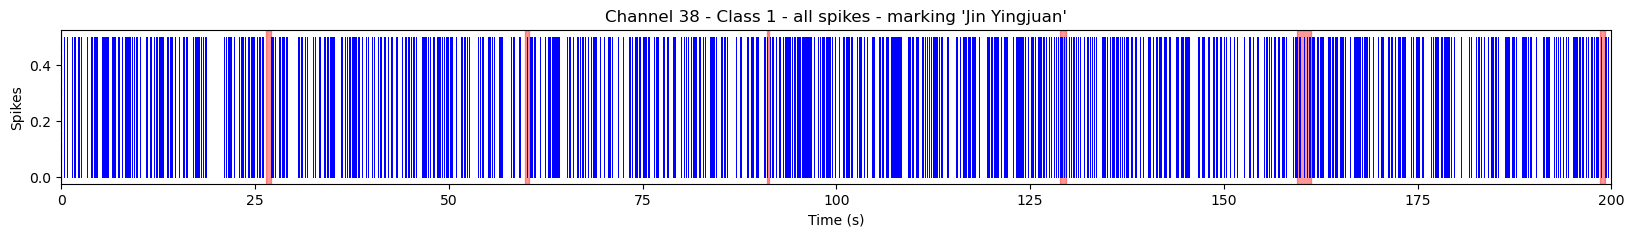

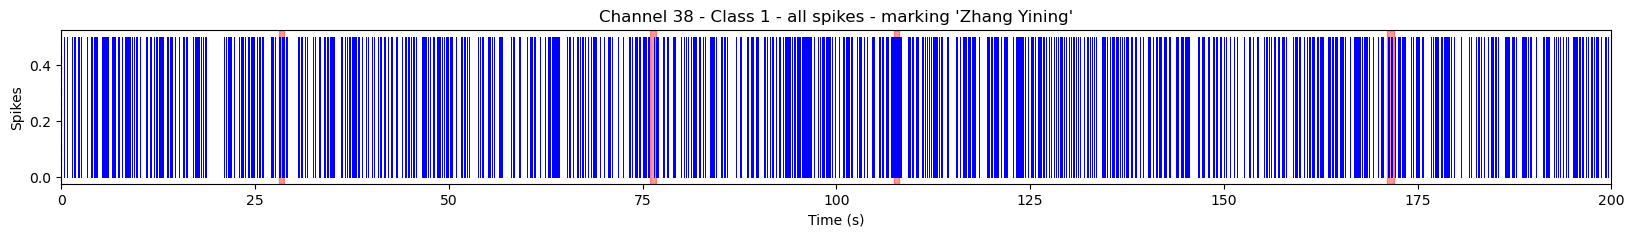

In [12]:
channel = 38
class_num = 1

df_channel = df_clusters_all[df_clusters_all['channel'] == channel]
df_class = df_channel[df_channel['class'] == class_num] 
df_class['spike_time'] = df_class['spike_time'] / 1000  #converting to seconds
df_class['spike_time'] = df_class['spike_time'] - start_subj_obj  #aligning to start of subject/object segment
                      

for name in df_names['english_name'].unique(): 
    df_name = df_names[(df_names['english_name'] == name) & (df_names['speaker_id'] == 1)] #only subject's 

    plt.figure(figsize=(20, 2))
    for index, row in df_name.iterrows():
        start_time = row['start_time']
        end_time = row['end_time'] 
        spikes = df_class['spike_time']

        plt.vlines(spikes, ymin=0, ymax=0.5, color='b',alpha=0.3, linewidth=0.5)

        plt.axvspan(start_time, end_time, color='r', alpha=0.4)

        """
        spikes_in_name = df_class_1[(df_class_1['spike_time'] >= start_time - 0.5) & (df_class_1['spike_time'] <= end_time + 0.5)]

        num_trials = len(spikes_in_name)

        for trial in range(num_trials):
            spike = spikes_in_name['spike_time'].iloc[trial]
            plt.vlines(spike, ymin=0, ymax=0.5, color='b')
        """

    plt.title(f"Channel {channel} - Class {class_num} - all spikes - marking '{name}'")
    plt.xlabel('Time (s)')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(0, 200)
    plt.ylabel('Spikes')
    plt.show()
    #plt.xlim(start_time - 0.5, end_time + 0.5)




    

C:\Users\ingri\AppData\Local\Temp\ipykernel_14428\2193655103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['spike_time'] = df_class['spike_time'] / 1000  #converting to seconds
C:\Users\ingri\AppData\Local\Temp\ipykernel_14428\2193655103.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['spike_time'] = df_class['spike_time'] - start_subj_obj  #aligning to start of subject/object segment


       class  spike_time  channel
53147    2.0 -175.275567       44
53160    2.0 -173.950533       44
53164    2.0 -173.597200       44
53166    2.0 -173.394967       44
53175    2.0 -172.860233       44
53182    2.0 -171.974167       44
53191    2.0 -171.102567       44
53197    2.0 -170.419133       44
53200    2.0 -170.026833       44
53204    2.0 -169.704433       44


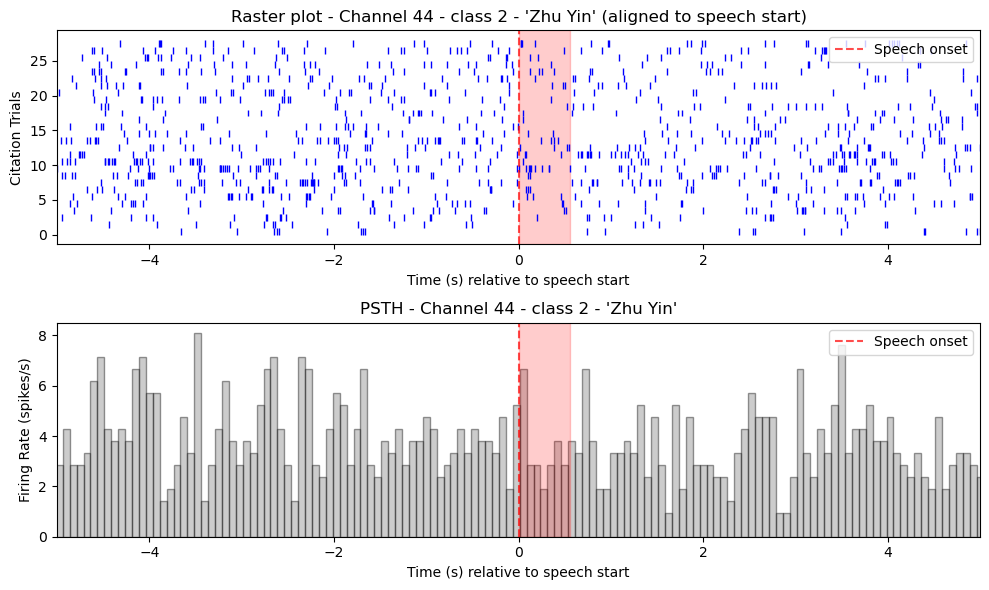

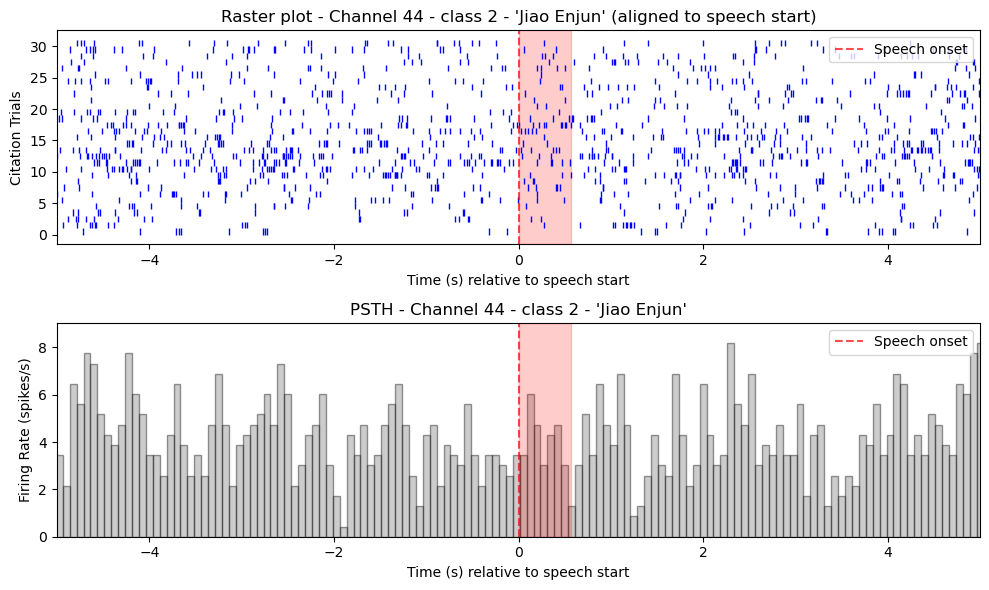

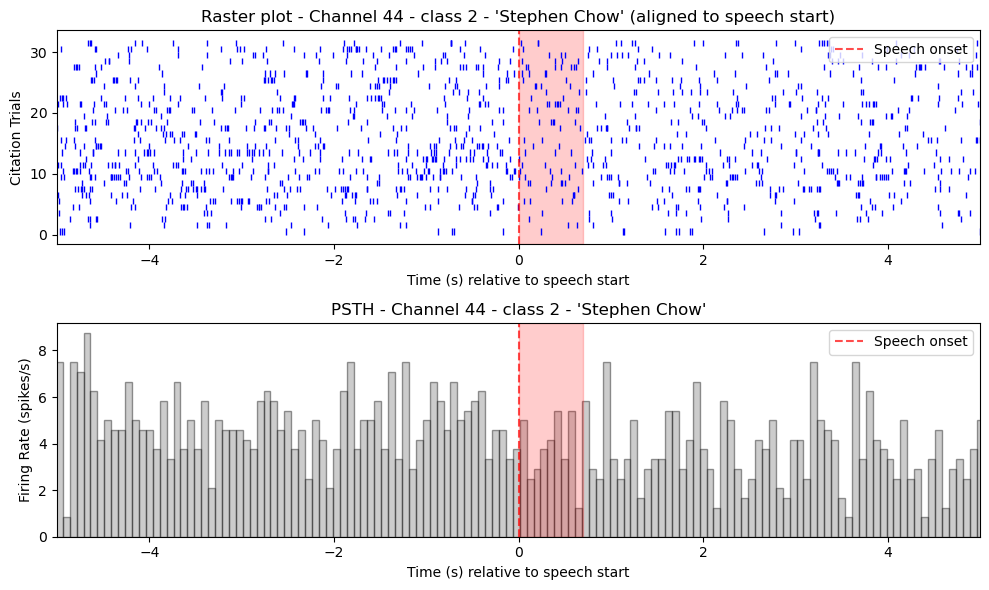

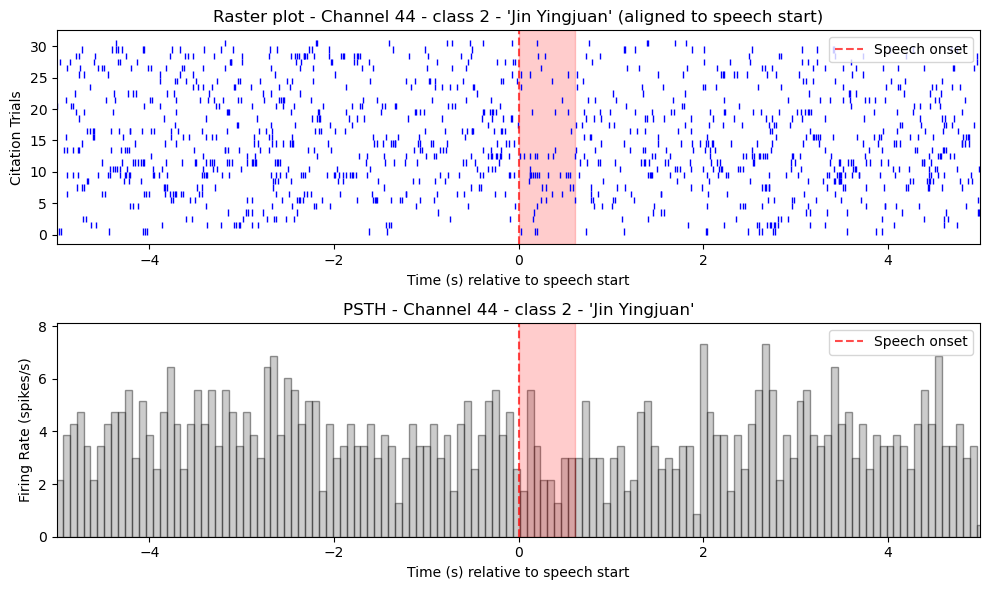

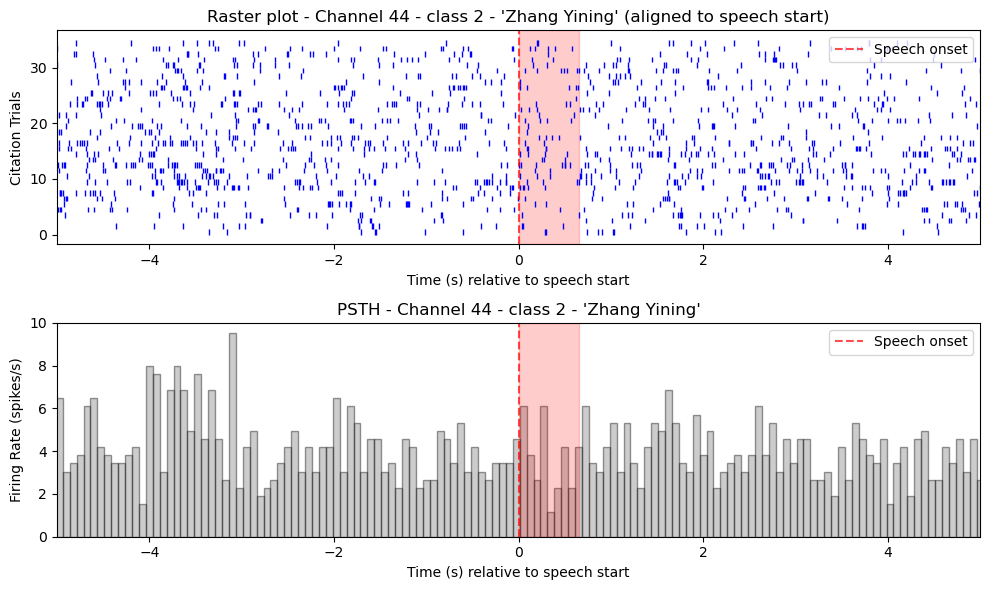

In [ ]:
#Plotting raster and PSTH (for speech)

channel = 44 
class_num = 2 
bin_size = 0.075 # 50 ms bins 
x_lim = [-5, 5] 

df_channel = df_clusters_all[df_clusters_all['channel'] == channel] 
df_class = df_channel[df_channel['class'] == class_num] 
df_class['spike_time'] = df_class['spike_time'] / 1000  #converting to seconds 
df_class['spike_time'] = df_class['spike_time'] - start_subj_obj  #aligning to start of subject/object segment 

print(df_class.head(10)) 
                      

for name in df_names['english_name'].unique(): 
    df_name = df_names[(df_names['english_name'] == name) & (df_names['speaker_id'] == 1)] #only subject's 

    aligned_spikes_all = []  # armazenará todos os spikes alinhados de todos os trials
    
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    
    for trial_idx, (_, row) in enumerate(df_name.iterrows()):
        start_time = row['start_time']
        end_time = row['end_time']

        #window (1 second before and after the name)
        mask = (df_class['spike_time'] >= start_time - 10) & (df_class['spike_time'] <= end_time + 10)
        spikes_name = df_class.loc[mask, 'spike_time']

        aligned_spikes = spikes_name - start_time  # Align spikes to the start time

        aligned_spikes_all.extend(aligned_spikes)

        plt.vlines(aligned_spikes, trial_idx, trial_idx + 1, color='b', linewidth=1)

        #plt.axvspan(0, end_time - start_time, color='red', alpha=0.2)

    start_time_mean = df_name['start_time'].mean()
    end_time_mean = df_name['end_time'].mean()
    plt.axvspan(0, end_time_mean - start_time_mean, color='red', alpha=0.2)
        
    plt.axvline(0, color='red', linestyle='--', alpha=0.7, label="Speech onset")  # Mark speech start   
    plt.title(f"Raster plot - Channel {channel} - class {class_num} - '{name}' (aligned to speech start)")
    plt.xlabel("Time (s) relative to speech start")
    plt.xlim(x_lim)
    plt.ylabel("Citation Trials")
    plt.legend()


    # Plotting PSTH (Peri-Stimulus Time Histogram)
    plt.subplot(2, 1, 2)
    aligned_spikes_all = np.array(aligned_spikes_all)
    bins = np.arange(-10, 10 + bin_size, bin_size)
    counts, edges = np.histogram(aligned_spikes_all, bins=bins)

    # Calculate firing rates (spikes per second)
    rate = counts / (len(df_name) * bin_size)  # Firing rate in Hz 

    plt.bar(edges[:-1], rate, width=bin_size, color='gray', edgecolor='black', alpha=0.4)
    plt.axvline(0, color='red', linestyle='--', alpha=0.7, label="Speech onset")  # Mark speech start

    for trial_idx, (_, row) in enumerate(df_name.iterrows()):
        start_time = row['start_time']
        end_time = row['end_time']
        #plt.axvspan(0, end_time - start_time, color='red', alpha=0.2)
    plt.axvspan(0, end_time_mean - start_time_mean, color='red', alpha=0.2)
    plt.xlabel("Time (s) relative to speech start")
    plt.ylabel("Firing Rate (spikes/s)")
    plt.title(f"PSTH - Channel {channel} - class {class_num} - '{name}'")
    plt.xlim(x_lim)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


    


C:\Users\ingri\AppData\Local\Temp\ipykernel_20720\4239861927.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1['spike_time'] = df_class_1['spike_time'] / 1000  #converting to seconds


array([-1.00000000e+01, -9.95000000e+00, -9.90000000e+00, -9.85000000e+00,
       -9.80000000e+00, -9.75000000e+00, -9.70000000e+00, -9.65000000e+00,
       -9.60000000e+00, -9.55000000e+00, -9.50000000e+00, -9.45000000e+00,
       -9.40000000e+00, -9.35000000e+00, -9.30000000e+00, -9.25000000e+00,
       -9.20000000e+00, -9.15000000e+00, -9.10000000e+00, -9.05000000e+00,
       -9.00000000e+00, -8.95000000e+00, -8.90000000e+00, -8.85000000e+00,
       -8.80000000e+00, -8.75000000e+00, -8.70000000e+00, -8.65000000e+00,
       -8.60000000e+00, -8.55000000e+00, -8.50000000e+00, -8.45000000e+00,
       -8.40000000e+00, -8.35000000e+00, -8.30000000e+00, -8.25000000e+00,
       -8.20000000e+00, -8.15000000e+00, -8.10000000e+00, -8.05000000e+00,
       -8.00000000e+00, -7.95000000e+00, -7.90000000e+00, -7.85000000e+00,
       -7.80000000e+00, -7.75000000e+00, -7.70000000e+00, -7.65000000e+00,
       -7.60000000e+00, -7.55000000e+00, -7.50000000e+00, -7.45000000e+00,
       -7.40000000e+00, -

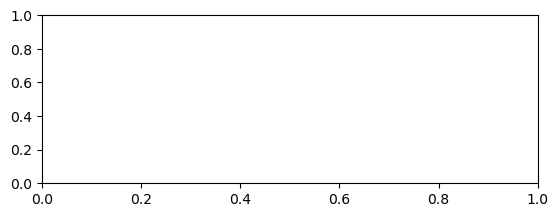

In [ ]:
#TEST

channel = 38
bin_size = 0.05 # 50 ms bins

df_channel = df_clusters_all[df_clusters_all['channel'] == channel]
df_class_1 = df_channel[df_channel['class'] == 1] 
df_class_1['spike_time'] = df_class_1['spike_time'] / 1000  #converting to seconds
                      

for name in df_names['english_name'].unique(): 
    df_name = df_names[(df_names['english_name'] == name) & (df_names['speaker_id'] == 1)] #only subject's 

    aligned_spikes_all = []  # armazenará todos os spikes alinhados de todos os trials
    
    plt.subplot(2, 1, 1)
    
    for trial_idx, (_, row) in enumerate(df_name.iterrows()):
        start_time = row['start_time']
        end_time = row['end_time']

        #window (1 second before and after the name)
        mask = (df_class_1['spike_time'] >= start_time - 10) & (df_class_1['spike_time'] <= end_time + 10)
        spikes_name = df_class_1.loc[mask, 'spike_time']

        aligned_spikes = spikes_name - start_time  # Align spikes to the start time

        aligned_spikes_all.extend(aligned_spikes)

    aligned_spikes_all = np.array(aligned_spikes_all)
    bins = np.arange(-10, 10 + bin_size, bin_size)
    #counts, edges = np.histogram(aligned_spikes_all, bins=bins)
